# Payment Fraud - Empowering Financial Security

Detecting Fraudulent Transactions with Advanced Machine Learning & Predictive Analytics
About the Dataset:
This dataset contains 38,662 e-commerce transactions annotated as legitimate or potentially fraudulent.

## Table of Content

1. Libraries
2. Data Preprocessing  
3. Exploratory Data Analysis
4. Machine Learning Models

## 1. Libraries

In [325]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 2. Data Preprocessing

2.1 Previewing the dataset

In [326]:
df=pd.read_csv("payment_fraud.csv")
print(df.info())
print()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB
None

   accountAgeDays  numItems  localTime paymentMethod  paymentMethodAgeDays  \
0              29         1   4.745402        paypal             28.204861   
1             725         1   4.742303   storecredit              0.000000   
2             845         1   4.921318    creditcard              0.000000   
3 

2.2 Columns

In [327]:
print(df.columns)
df.columns=df.columns.str.lower()
print(df.columns)

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'Category', 'isWeekend', 'label'],
      dtype='object')
Index(['accountagedays', 'numitems', 'localtime', 'paymentmethod',
       'paymentmethodagedays', 'category', 'isweekend', 'label'],
      dtype='object')


2.3 Null Data

In [328]:
print(df.isna().sum())

accountagedays            0
numitems                  0
localtime                 0
paymentmethod             0
paymentmethodagedays      0
category                 95
isweekend               560
label                     0
dtype: int64


In [329]:
print(df['category'].mode()[0])
print()
print(df['isweekend'].mode()[0])

shopping

0.0


In [330]:
df['category'].fillna("unidentified",inplace=True)
df['isweekend'].fillna("0",inplace=True)

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\3930728771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category'].fillna("unidentified",inplace=True)
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\3930728771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [331]:
df['isweekend'] = df['isweekend'].astype(int)

2.4 Duplicated Data

In [332]:
print("Duplicated Data")
print(df.duplicated().sum())
df=df.drop_duplicates()
print("Duplicated Data after remove duplicated")
print(df.duplicated().sum())

Duplicated Data
3033
Duplicated Data after remove duplicated
0


In [333]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 36188 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountagedays        36188 non-null  int64  
 1   numitems              36188 non-null  int64  
 2   localtime             36188 non-null  float64
 3   paymentmethod         36188 non-null  object 
 4   paymentmethodagedays  36188 non-null  float64
 5   category              36188 non-null  object 
 6   isweekend             36188 non-null  int32  
 7   label                 36188 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 2.3+ MB
None
   accountagedays  numitems  localtime paymentmethod  paymentmethodagedays  \
0              29         1   4.745402        paypal             28.204861   
1             725         1   4.742303   storecredit              0.000000   
2             845         1   4.921318    creditcard              0.000000  

Data Preprocessing:

- The general information of the dataset and the first rows were reviewed.
- All column names were converted to lowercase for consistency.
- Missing values were examined and filled using the mode (most frequent value), and column data types were adjusted accordingly.
- Duplicate records were removed to ensure data quality.
- Finally, the dataset was validated to confirm that all transformations were applied correctly.

# 3. Exploratory Data Analysis

3.1 General Stats 

In [334]:
print(df.describe())

       accountagedays      numitems     localtime  paymentmethodagedays  \
count    36188.000000  36188.000000  36188.000000          36188.000000   
mean       813.805958      1.091412      4.741856            132.808107   
std        779.398060      0.589318      0.396812            292.737789   
min          1.000000      1.000000      0.421214              0.000000   
25%         74.000000      1.000000      4.742303              0.000000   
50%        550.000000      1.000000      4.886641              0.154167   
75%       1639.000000      1.000000      4.962055            108.652431   
max       2000.000000     29.000000      5.040929           1999.580556   

          isweekend         label  
count  36188.000000  36188.000000  
mean       0.494225      0.010943  
std        0.499974      0.104036  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000  


In [335]:
df_creditrisk=df[df['label']==1]
print(df_creditrisk.shape)
df_nocreditrisk=df[df['label']==0]
print(df_nocreditrisk.shape)

(396, 8)
(35792, 8)


In [336]:
print("Normal Behavior")
print(df_nocreditrisk.describe())
print()
print("Fraud Behavior")
print(df_creditrisk.describe())

Normal Behavior
       accountagedays      numitems     localtime  paymentmethodagedays  \
count    35792.000000  35792.000000  35792.000000          35792.000000   
mean       822.798782      1.088539      4.744127            134.277291   
std        778.968505      0.585760      0.392844            294.017532   
min          2.000000      1.000000      0.421214              0.000000   
25%         80.000000      1.000000      4.742303              0.000000   
50%        569.000000      1.000000      4.886641              0.268056   
75%       1648.000000      1.000000      4.962055            111.096007   
max       2000.000000     29.000000      5.040929           1999.580556   

          isweekend    label  
count  35792.000000  35792.0  
mean       0.499693      0.0  
std        0.500007      0.0  
min        0.000000      0.0  
25%        0.000000      0.0  
50%        0.000000      0.0  
75%        1.000000      0.0  
max        1.000000      0.0  

Fraud Behavior
       accoun

## **Comparative Insights: Normal vs. Fraudulent Behavior**

1. **Account Age (accountagedays)**

   * Normal transactions come from accounts with an average age of **823 days**, showing a long and diverse history.
   * Fraudulent transactions, however, are exclusively tied to accounts that are only **1 day old**.
     👉 Fraudulent behavior is strongly linked to **newly created accounts**.

2. **Number of Items (numitems)**

   * Normal purchases usually involve a single item (**avg. 1.09 items**, max 29).
   * Fraudulent purchases show a slightly higher average (**1.35 items**) and a maximum of 10.
     👉 Fraudulent transactions tend to include **more items per purchase**.

3. **Local Time (localtime)**

   * Normal behavior clusters around regular hours (**avg. 4.74**).
   * Fraudulent behavior occurs at more unusual hours (**avg. 4.53**, wider dispersion from 2.59 to 5.04).
     👉 Fraud is often conducted at **less common transaction times**.

4. **Payment Method Age (paymentmethodagedays)**

   * Normal customers use payment methods with a significant history (**avg. 134 days**, up to \~2000 days).
   * Fraudulent customers almost exclusively use **new payment methods** (avg. ≈ 0 days, max \~1).
     👉 Fraud strongly correlates with **new or untested payment methods**.

5. **Weekend Activity (isweekend)**

   * Normal transactions are evenly distributed between weekdays and weekends (**\~50/50**).
   * Fraudulent transactions **never occur on weekends**.
     👉 Fraud is concentrated during **weekdays**.

### **Overall Conclusion**

Fraudulent behavior clearly diverges from normal customer activity:

* It originates from **new accounts** with **new payment methods**.
* It tends to include **more items per purchase**, conducted at **unusual hours**, and almost **never during weekends**.
* In contrast, normal behavior shows **longer account histories, established payment methods, and stable patterns across weekdays and weekends**.

3.2 Correlation Matrix

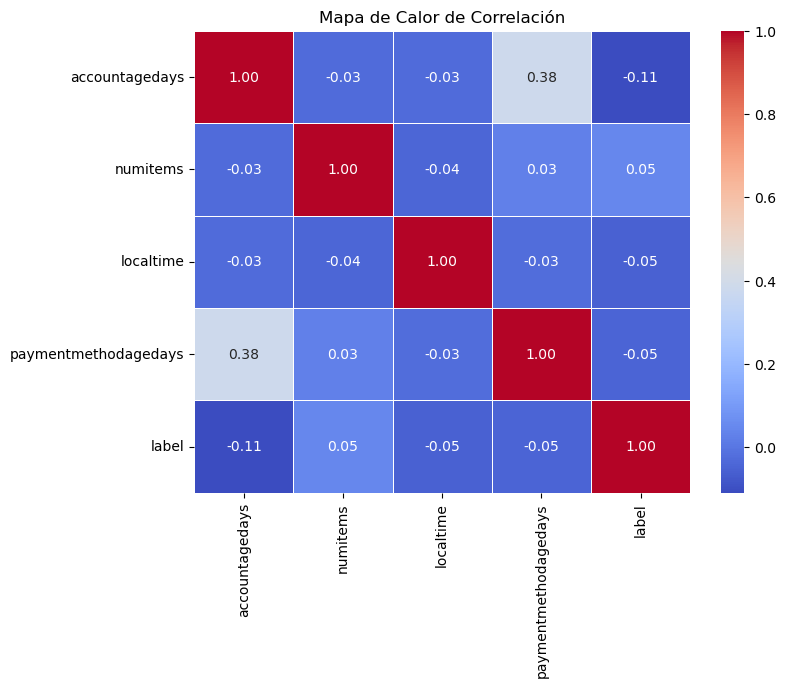

In [337]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix=numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

Remark
- There are no strong correlations with the label (fraud) variable.
- This suggests that fraud does not depend linearly on a single variable, but rather on a combination of factors.

3.3 Graphs 

In [338]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['paymentmethod', 'category']
Numerical Features: ['accountagedays', 'numitems', 'localtime', 'paymentmethodagedays', 'isweekend', 'label']


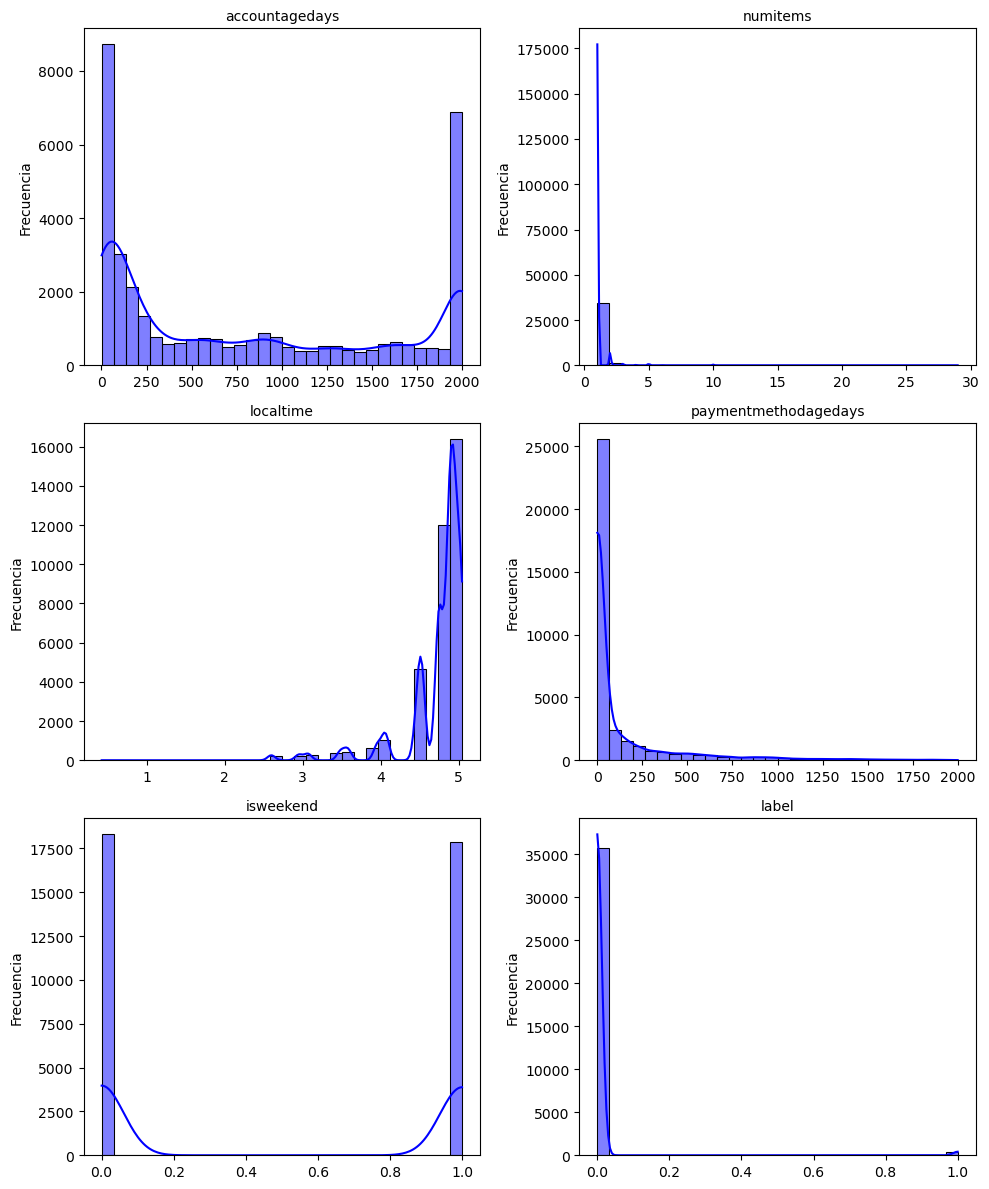

In [339]:
n_cols = 2  
n_rows = math.ceil(len(numerical_features) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f"{col}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Overall Insight
- The global data reveals clear behavioral contrasts
- Normal customers are characterized by long account/payment histories and consistent activity across time and weekends.
- Fraudulent behavior is often linked to new accounts, recent payment methods, and slightly unusual purchase patterns.
- The strong class imbalance confirms the importance of specialized preprocessing and modeling strategies for fraud detection.

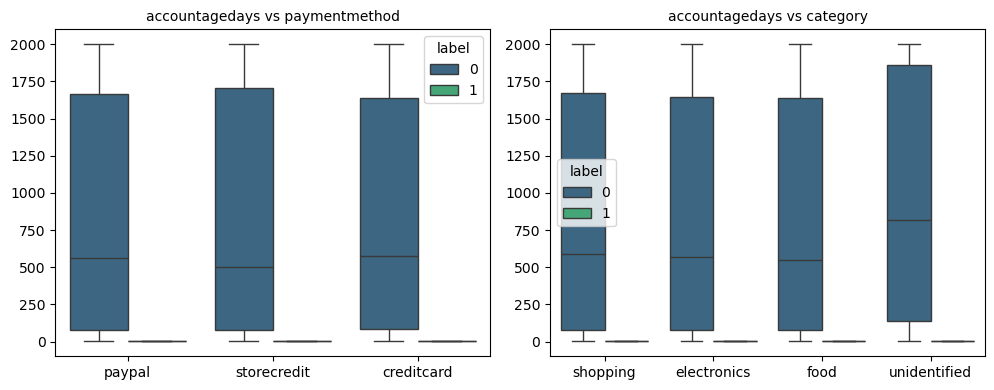

In [340]:
num_col = numerical_features[0]  
n_cols = 3
n_rows = math.ceil(len(categorical_features) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, cat_col in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=cat_col, y=num_col, hue="label", data=df, palette="viridis", showfliers=False)
    plt.title(f'{num_col} vs {cat_col}', fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


## In contrast, legitimate users show diverse and longer account histories, making account age one of the most critical features for fraud detection.

Data Split by Labels Finantial Risk and Normal Behavior

In [341]:
print(numerical_features)
print(categorical_features)

['accountagedays', 'numitems', 'localtime', 'paymentmethodagedays', 'isweekend', 'label']
['paymentmethod', 'category']


Normal Behavior

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


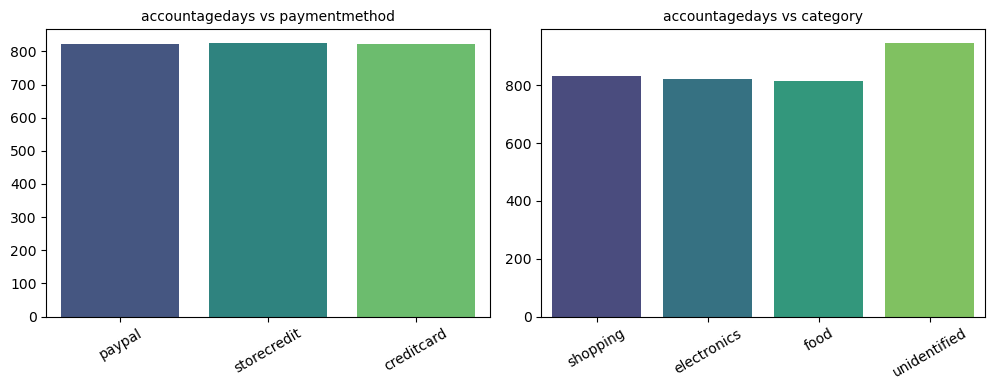

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


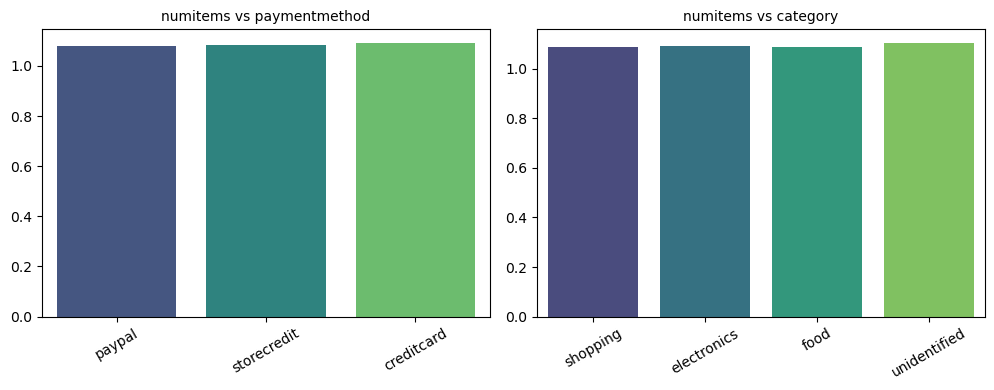

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


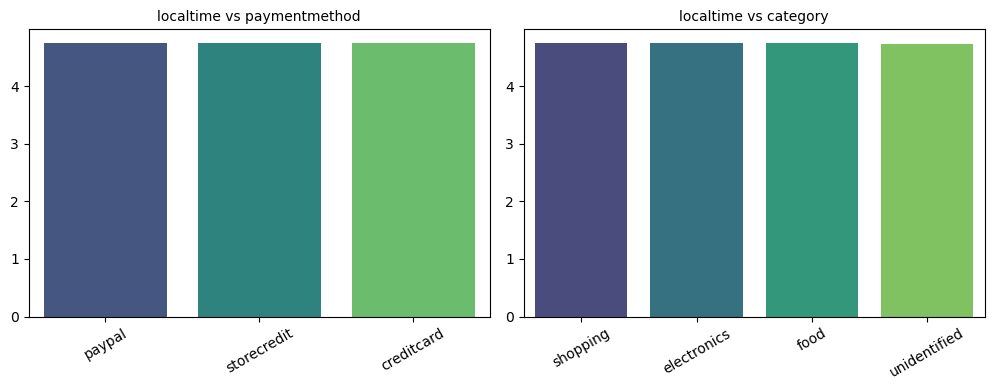

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


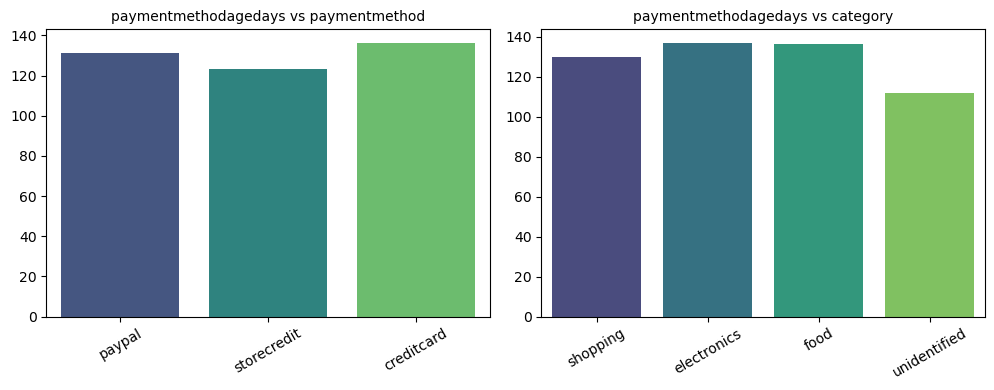

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


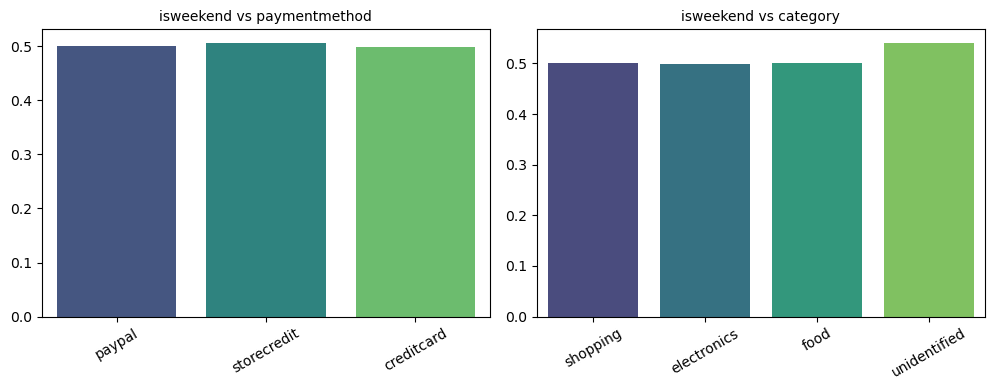

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\292307353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


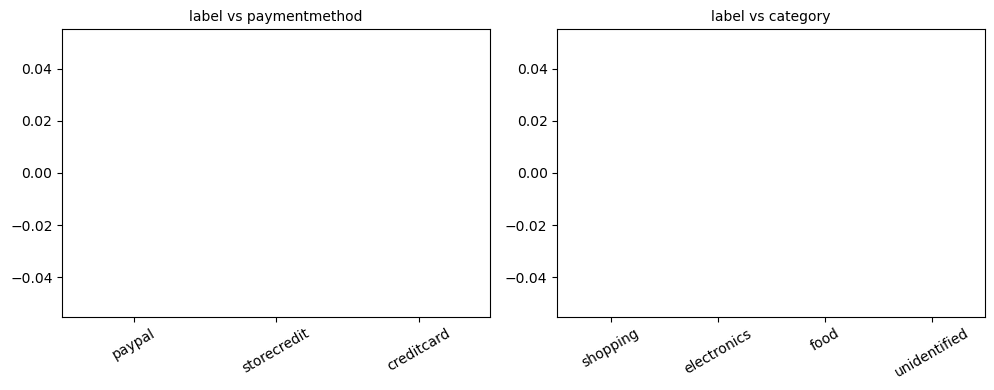

In [342]:
for num_col in numerical_features:
    n_cols = 3
    n_rows = math.ceil(len(categorical_features) / n_cols)

    plt.figure(figsize=(n_cols*5, n_rows*4))

    for i, cat_col in enumerate(categorical_features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.barplot(
            x=cat_col, 
            y=num_col, 
            data=df_nocreditrisk, 
            estimator=np.mean,   
            palette="viridis",
            ci=None
        )
        plt.title(f'{num_col} vs {cat_col}', fontsize=10)
        plt.xticks(rotation=30)
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

Overall Conclusion Normal Behavior 
- Normal customer behavior is stable, consistent, and predictable:
- They use accounts with long histories.
- They purchase few items per transaction.
- They operate in regular time frames.
- Their activity is evenly distributed between weekdays and weekends, across all payment methods and categories.

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


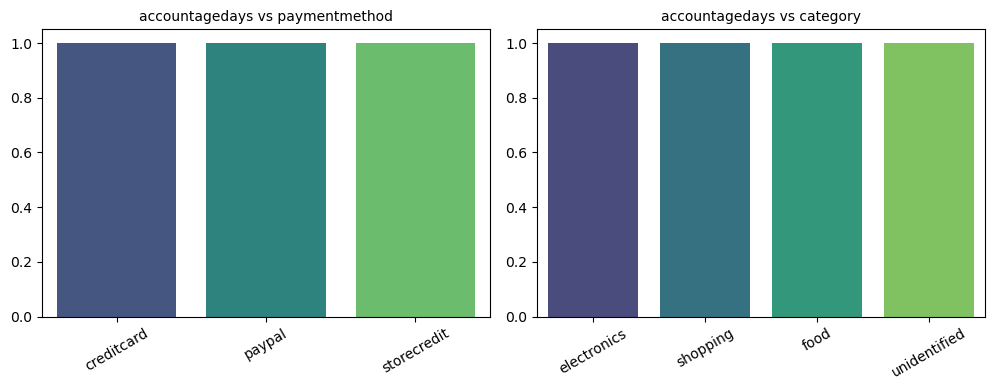

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


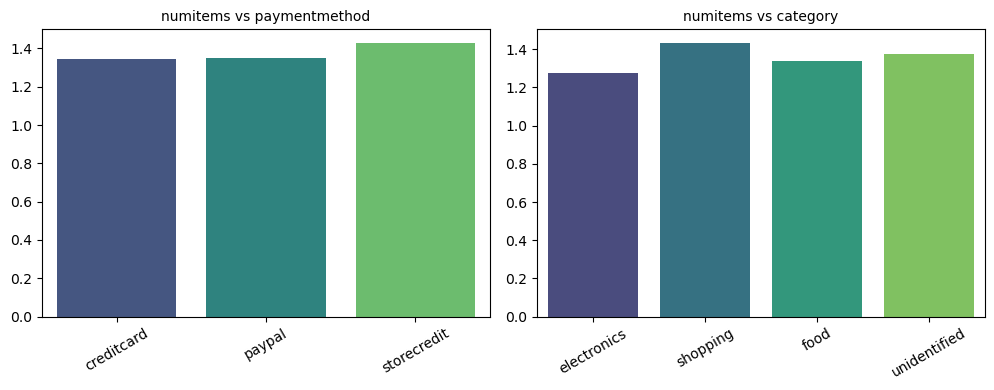

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


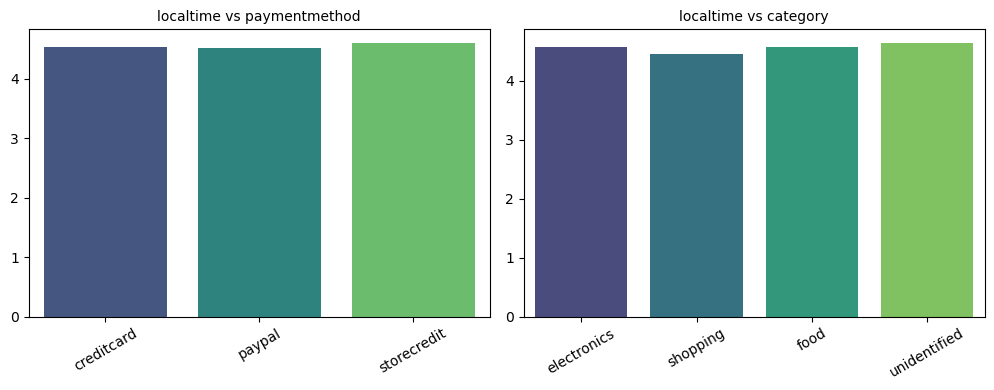

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


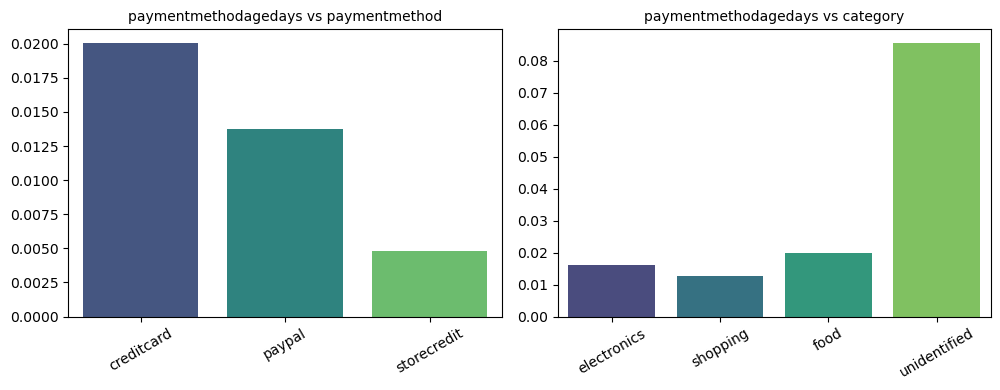

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


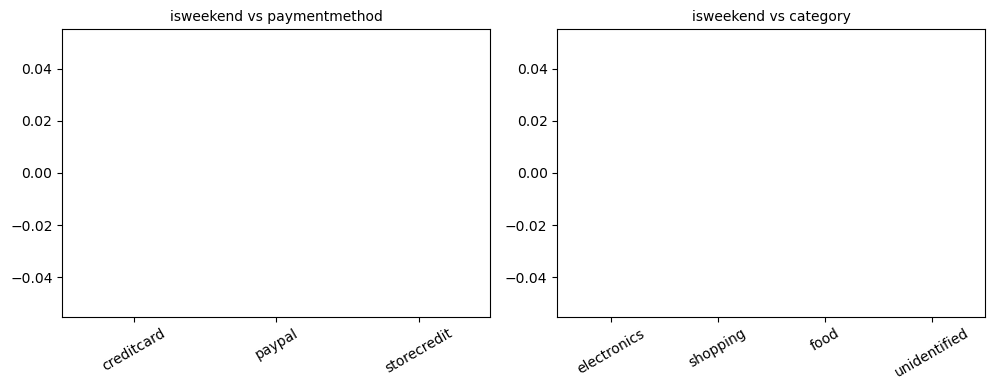

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\238533687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


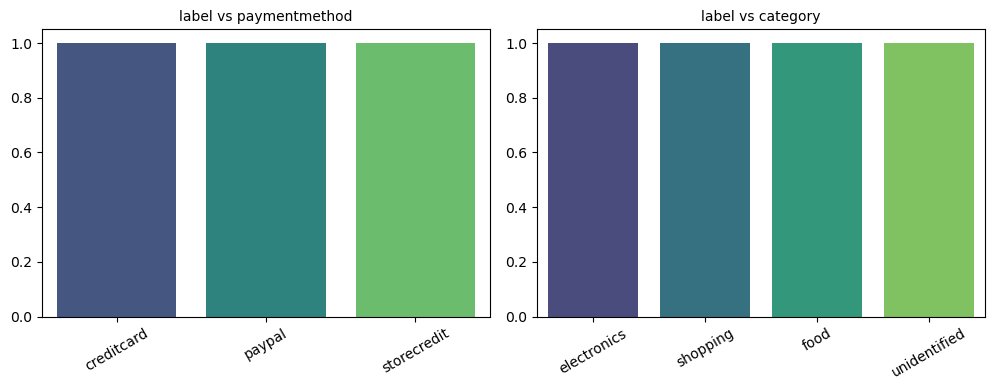

In [343]:
for num_col in numerical_features:
    n_cols = 3
    n_rows = math.ceil(len(categorical_features) / n_cols)

    plt.figure(figsize=(n_cols*5, n_rows*4))

    for i, cat_col in enumerate(categorical_features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.barplot(
            x=cat_col, 
            y=num_col, 
            data=df_creditrisk, 
            estimator=np.mean,   
            palette="viridis",
            ci=None
        )
        plt.title(f'{num_col} vs {cat_col}', fontsize=10)
        plt.xticks(rotation=30)
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

Fraudulent behavior is characterized by:
- New accounts and payment methods with no history.
- Slightly larger item counts per purchase.
- Activity occurring in narrower and unusual time frames.
- Independence from payment method or product category (fraud can occur anywhere, but always with the same “new account/new method” signature).

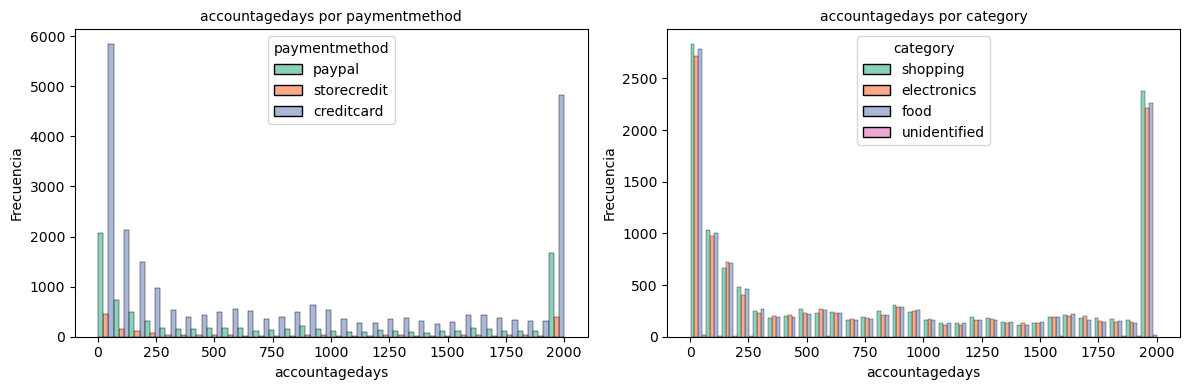

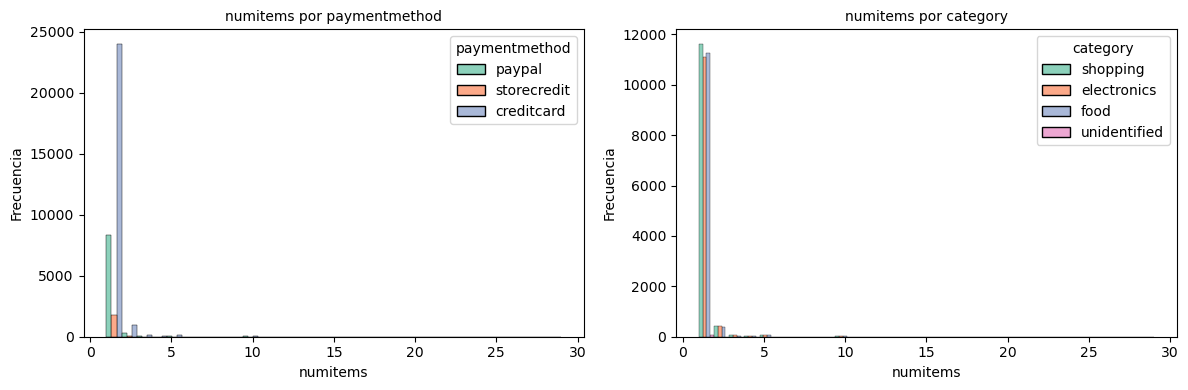

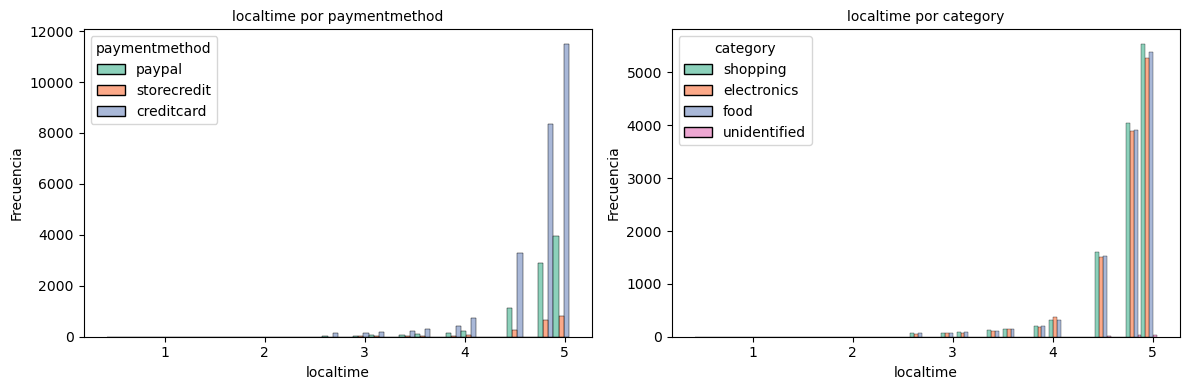

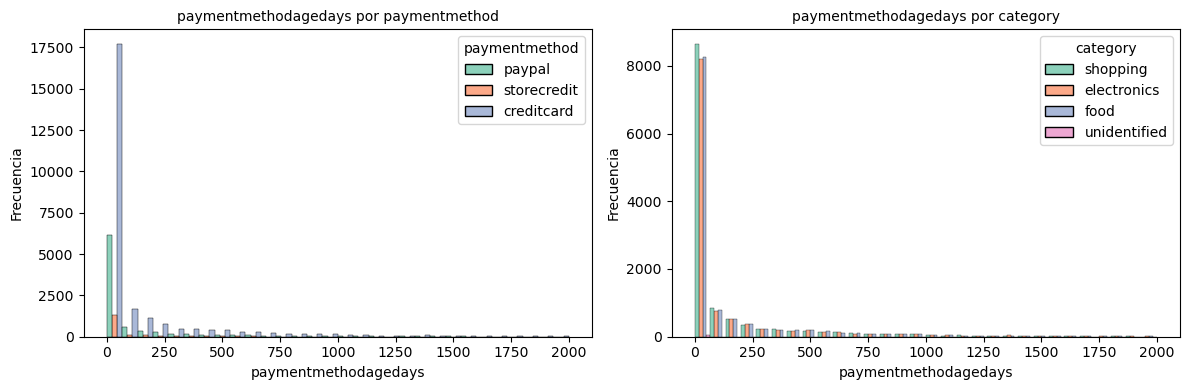

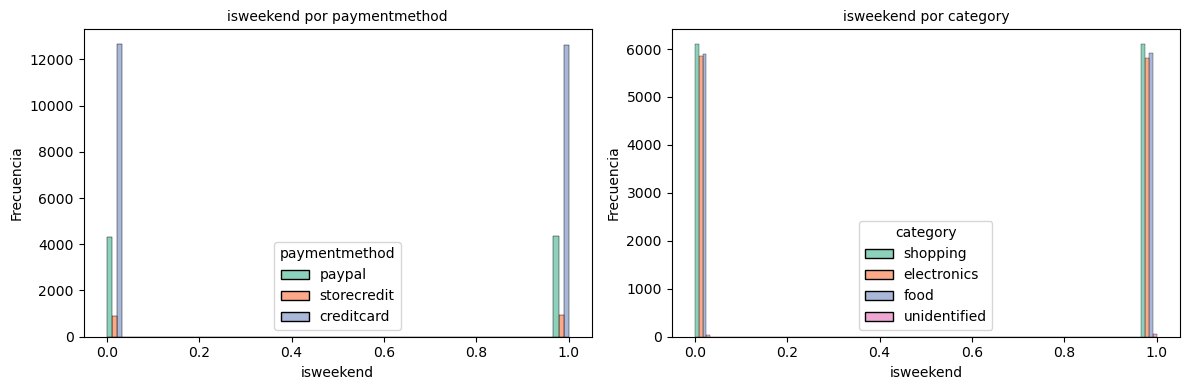

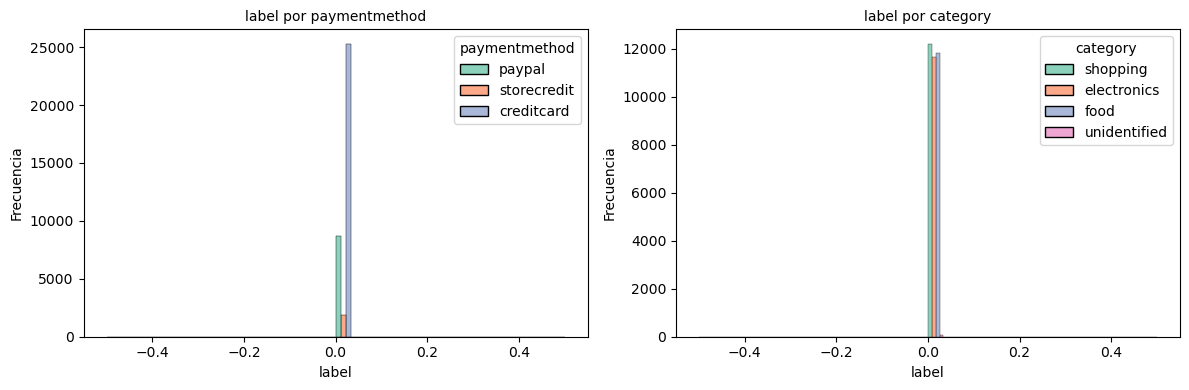

In [344]:
for num_col in numerical_features:
    n_cols = 2
    n_rows = math.ceil(len(categorical_features) / n_cols)

    plt.figure(figsize=(n_cols*6, n_rows*4))

    for i, cat_col in enumerate(categorical_features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(
            data=df_nocreditrisk,
            x=num_col,         
            hue=cat_col,       
            multiple="dodge",  
            bins=30,           
            palette="Set2"
        )
        plt.title(f"{num_col} por {cat_col}", fontsize=10)
        plt.xlabel(num_col)
        plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

Normal behavior is defined by:
- Stable account and payment histories, with both long-term and new accounts included.
- Small-scale transactions (typically 1 item).
- Consistent purchasing times during regular hours.
- Balanced activity across weekdays and weekends, independent of payment method or category.

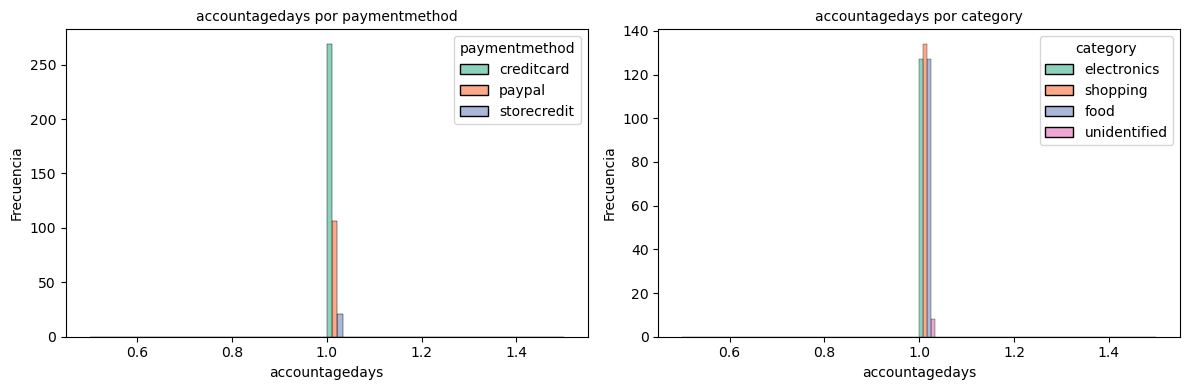

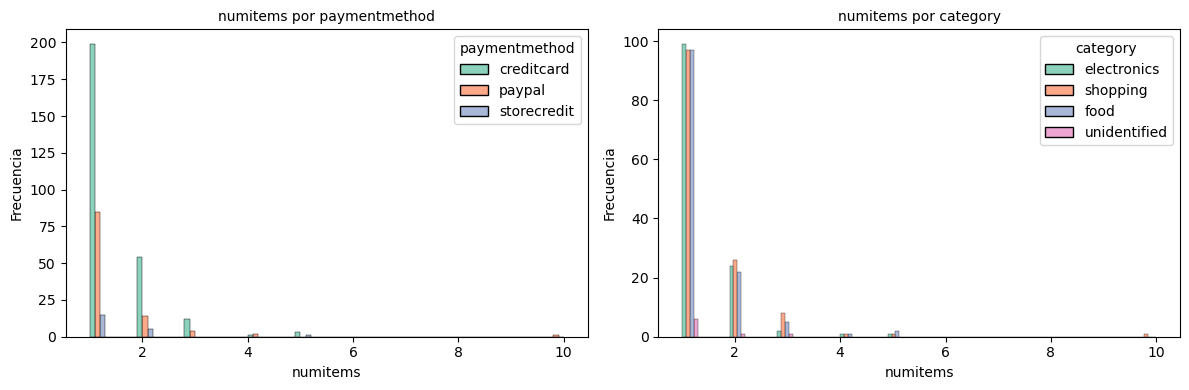

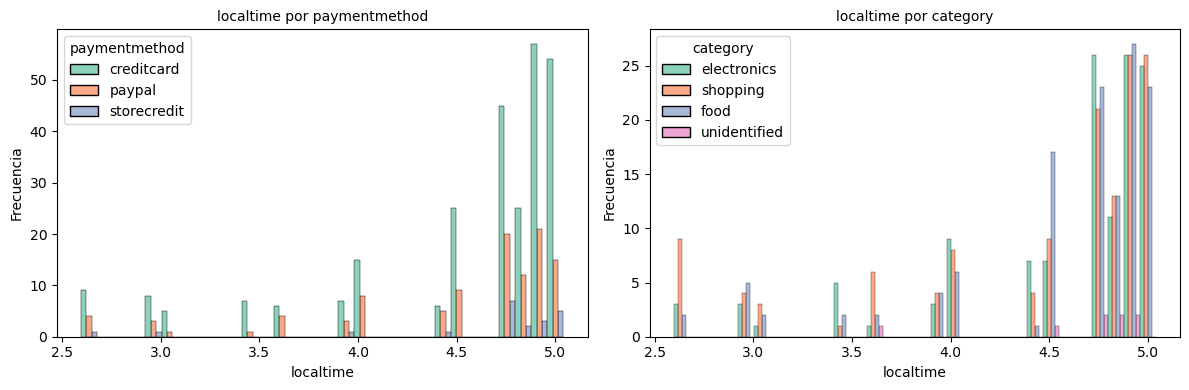

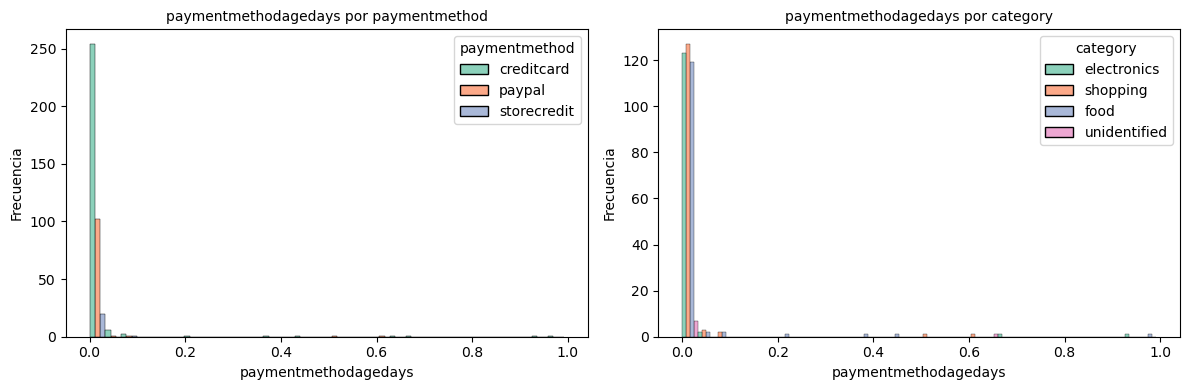

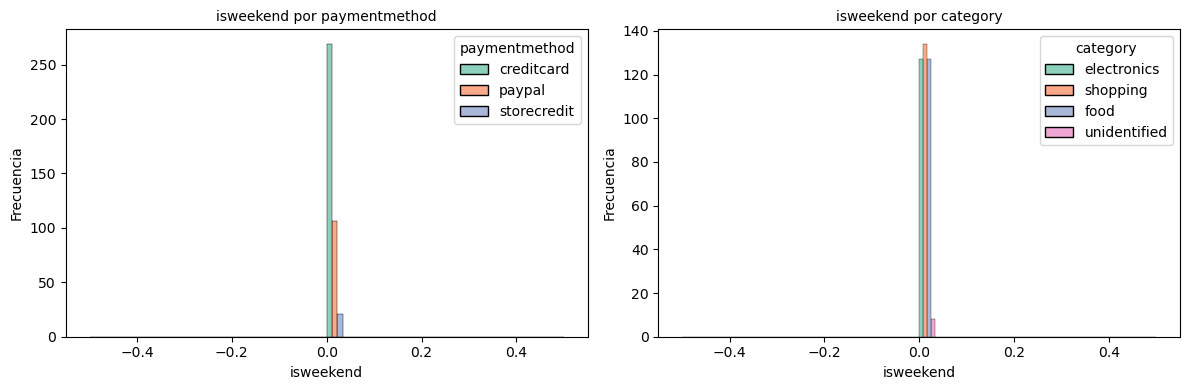

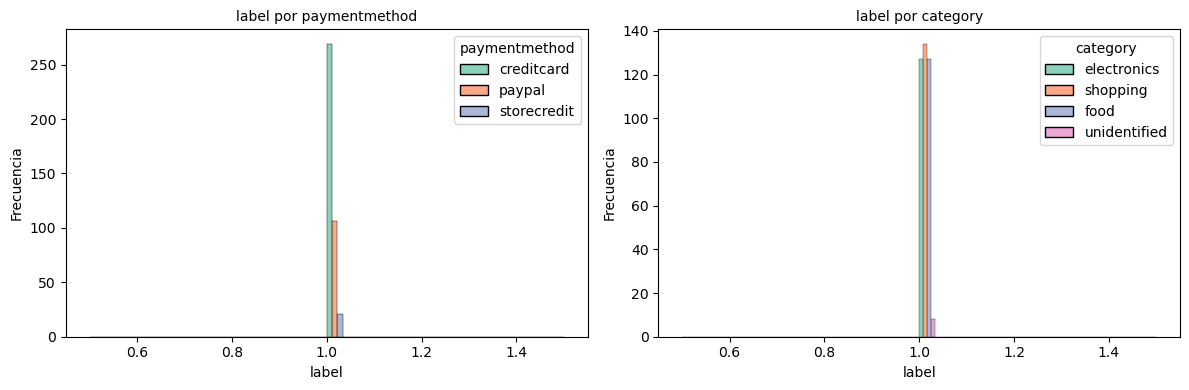

In [345]:
for num_col in numerical_features:
    n_cols = 2  
    n_rows = math.ceil(len(categorical_features) / n_cols)

    plt.figure(figsize=(n_cols*6, n_rows*4))

    for i, cat_col in enumerate(categorical_features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(
            data=df_creditrisk,
            x=num_col,         
            hue=cat_col,       
            multiple="dodge",  
            bins=30,           
            palette="Set2"
        )
        plt.title(f"{num_col} por {cat_col}", fontsize=10)
        plt.xlabel(num_col)
        plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

Fraudulent transactions are defined by:
- New accounts and new payment methods with no history.
- Slightly higher item counts compared to legitimate users.
- Activity clustered at specific times, often outside normal behavior patterns.
- Concentration on weekdays, avoiding weekends.
- Independence from product type or payment channel, meaning fraud attempts can appear in any context but always share the same structural characteristics.

# 4.Machine Learning Models

In [346]:
df_dummies=pd.get_dummies(df,drop_first=True)
df_dummies=df_dummies.drop("isweekend",axis=1)

In [347]:
df_dummies

,accountagedays,numitems,localtime,paymentmethodagedays,label,paymentmethod_paypal,paymentmethod_storecredit,category_food,category_shopping,category_unidentified
0,29,1,4.745402,28.204861,0,True,False,False,True,False
1,725,1,4.742303,0.000000,0,False,True,False,False,False
2,845,1,4.921318,0.000000,0,False,False,True,False,False
3,503,1,4.886641,0.000000,0,False,False,False,False,False
4,2000,1,5.040929,0.000000,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,0.000000,0,False,False,False,True,False
39217,1647,1,4.876771,377.930556,0,False,False,False,True,False
39218,1591,1,4.742303,0.000000,0,False,False,False,True,False
39219,237,1,4.921318,236.082639,0,False,False,False,True,False


In [348]:
features = df_dummies.drop("label", axis=1)
target = df_dummies["label"]

In [349]:
categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = features.select_dtypes(include='number').columns.tolist()

In [350]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=12345, stratify=target)

label
0    0.989065
1    0.010935
Name: proportion, dtype: float64


C:\Users\52921\AppData\Local\Temp\ipykernel_12308\749506516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, palette="Set2")


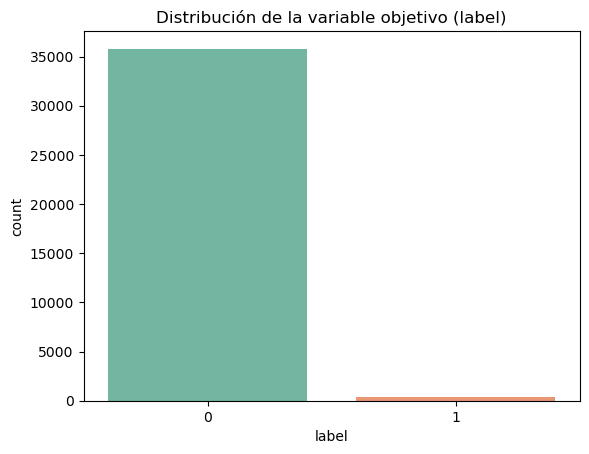

In [351]:
print(target_train.value_counts(normalize=True))
sns.countplot(x=target, palette="Set2")
plt.title("Distribución de la variable objetivo (label)")
plt.show()

4.1 Decision Tree

In [352]:
clf_tree = ImbPipeline(steps=[
    ('scaler', StandardScaler()),  
    ('smote', SMOTE(random_state=12345)),
    ('model', DecisionTreeClassifier(random_state=12345))
])

clf_tree.fit(features_train, target_train)

y_pred  = clf_tree.predict(features_test)
y_proba = clf_tree.named_steps['model'].predict_proba(features_test)[:, 1]

print("Accuracy:", accuracy_score(target_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(target_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(target_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(target_test, y_proba))


Accuracy: 1.0

Matriz de confusión:
 [[10738     0]
 [    0   119]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     10738
           1     1.0000    1.0000    1.0000       119

    accuracy                         1.0000     10857
   macro avg     1.0000    1.0000    1.0000     10857
weighted avg     1.0000    1.0000    1.0000     10857

ROC-AUC: 0.5


c:\Users\52921\anaconda3\envs\mportiz_tripleten\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


4.2 Logistc Regression

In [353]:
clf_log = ImbPipeline(steps=[
    ('scaler', StandardScaler()),  
    ('smote', SMOTE(random_state=12345)),
    ('model', LogisticRegression(max_iter=1000, random_state=12345))
])

clf_log.fit(features_train, target_train)

y_pred_log  = clf_log.predict(features_test)
y_proba_log = clf_log.named_steps['model'].predict_proba(features_test)[:, 1]

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(target_test, y_pred_log))
print("\nMatriz de confusión:\n", confusion_matrix(target_test, y_pred_log))
print("\nReporte de clasificación:\n", classification_report(target_test, y_pred_log, digits=4))
print("ROC-AUC:", roc_auc_score(target_test, y_proba_log))



=== Logistic Regression ===
Accuracy: 0.8611034355715207

Matriz de confusión:
 [[9230 1508]
 [   0  119]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0     1.0000    0.8596    0.9245     10738
           1     0.0731    1.0000    0.1363       119

    accuracy                         0.8611     10857
   macro avg     0.5366    0.9298    0.5304     10857
weighted avg     0.9898    0.8611    0.9158     10857

ROC-AUC: 0.9999999999999999


c:\Users\52921\anaconda3\envs\mportiz_tripleten\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [354]:
rf_clf = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=12345)),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,            
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',       
        n_jobs=-1,
        random_state=12345
    ))
])

rf_clf.fit(features_train, target_train)

y_pred  = rf_clf.predict(features_test)
y_proba = rf_clf.named_steps['model'].predict_proba(features_test)[:, 1]

print("=== Random Forest (baseline) ===")
print("Accuracy:", accuracy_score(target_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(target_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(target_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(target_test, y_proba))

=== Random Forest (baseline) ===
Accuracy: 1.0

Matriz de confusión:
 [[10738     0]
 [    0   119]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     10738
           1     1.0000    1.0000    1.0000       119

    accuracy                         1.0000     10857
   macro avg     1.0000    1.0000    1.0000     10857
weighted avg     1.0000    1.0000    1.0000     10857

ROC-AUC: 0.4070422171476152


c:\Users\52921\anaconda3\envs\mportiz_tripleten\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Overall Conclusion

Decision Tree and Random Forest appear too optimistic, likely memorizing the training data rather than learning real patterns. Their ROC-AUC scores confirm the lack of true predictive power.

Logistic Regression demonstrates more reliable behavior, achieving 100% fraud detection, though at the cost of wrongly flagging many legitimate transactions.

For practical fraud detection, Logistic Regression (or an improved ensemble method with regularization and parameter tuning) is more trustworthy than overfitted tree-based models.

C:\Users\52921\AppData\Local\Temp\ipykernel_12308\2556758016.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\52921\AppData\Local\Temp\ipykernel_12308\2556758016.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\52921\anaconda3\envs\mportiz_tripleten\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


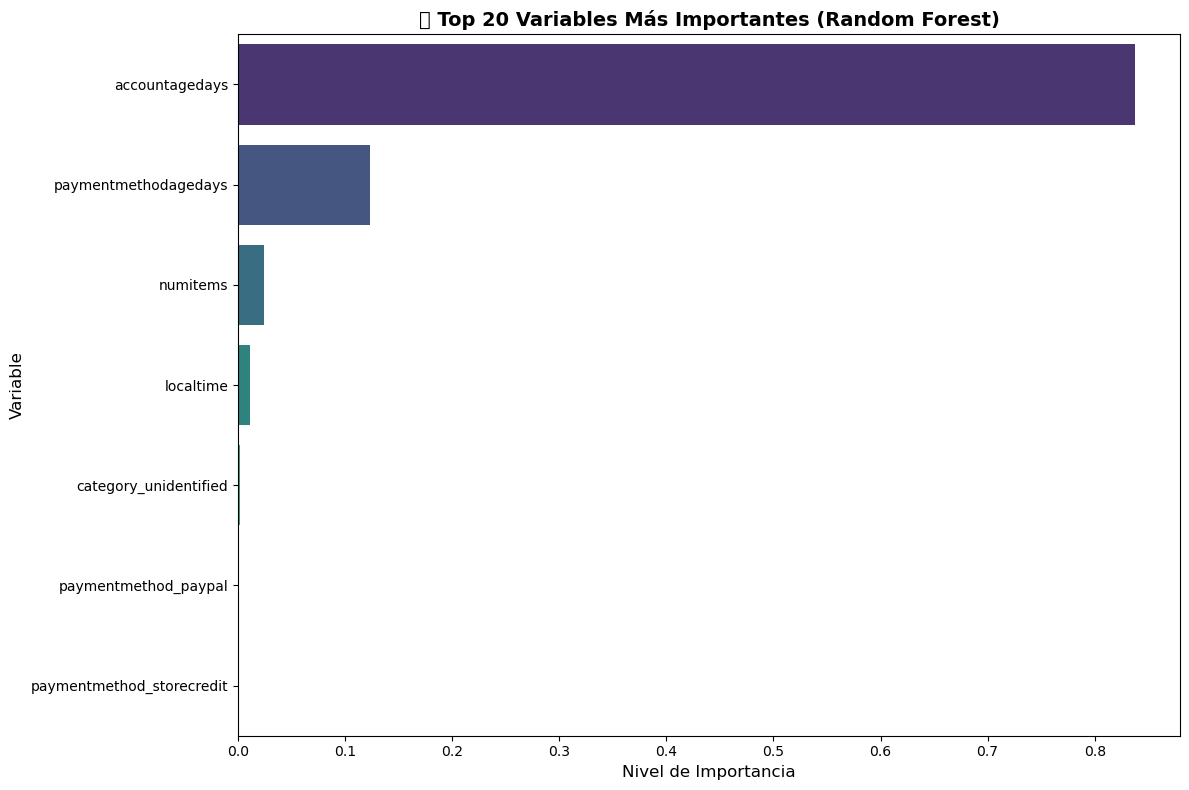

,Variable,Importancia
0,accountagedays,0.837703
3,paymentmethodagedays,0.123151
1,numitems,0.024676
2,localtime,0.011628
8,category_unidentified,0.001586
4,paymentmethod_paypal,0.000448
5,paymentmethod_storecredit,0.000285


In [355]:
all_feature_names = features_train.columns  
importances = rf_clf.named_steps['model'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Variable': all_feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=feature_importance_df.head(7),
    x='Importancia',
    y='Variable',
    palette='viridis'
)
plt.title('🔍 Top 20 Variables Más Importantes (Random Forest)', fontsize=14, weight='bold')
plt.xlabel('Nivel de Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.tight_layout()
plt.show()

feature_importance_df.head(7)

The model highlights that:

- Account age is the dominant factor in fraud detection.
- Payment method age also plays a critical role.
- Transaction size (numitems) and time of purchase (localtime) provide secondary insights.
- Product category and payment method type have little predictive value.

This reinforces that fraud detection in this dataset relies mainly on structural features of account/payment history, rather than contextual variables like product type or payment channel.

In [356]:
df_short = df[["accountagedays", "paymentmethodagedays", "numitems", "localtime","label"]]
print(df_short.head())

   accountagedays  paymentmethodagedays  numitems  localtime  label
0              29             28.204861         1   4.745402      0
1             725              0.000000         1   4.742303      0
2             845              0.000000         1   4.921318      0
3             503              0.000000         1   4.886641      0
4            2000              0.000000         1   5.040929      0


In [357]:
features = df_short.drop("label", axis=1)
target = df_short["label"]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [358]:
print(features_scaled)

[[-1.00695247 -0.35733238 -0.15511609  0.00893719]
 [-0.1139433  -0.45368226 -0.15511609  0.00112733]
 [ 0.0400238  -0.45368226 -0.15511609  0.45226682]
 ...
 [ 0.99718593 -0.45368226 -0.15511609  0.00112733]
 [-0.74007617  0.3527934  -0.15511609  0.45226682]
 [-0.6951691  -0.45367989 -0.15511609  0.75370103]]


## Variables were standardized (scaled) to normalize their distribution and prepare them for machine learning models.

In [359]:
features_scaled = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

features_train, features_test, target_train, target_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=12345, stratify=target
)

print("Shapes:")
print("features_train:", features_train.shape)
print("features_test:", features_test.shape)
print("target_train:", target_train.shape)
print("target_test:", target_test.shape)

Shapes:
features_train: (28950, 4)
features_test: (7238, 4)
target_train: (28950,)
target_test: (7238,)


In [360]:
clf_tree = ImbPipeline(steps=[  
    ('smote', SMOTE(random_state=12345)),
    ('model', DecisionTreeClassifier(random_state=12345))
])

clf_tree.fit(features_train, target_train)

y_pred  = clf_tree.predict(features_test)
y_proba = clf_tree.named_steps['model'].predict_proba(features_test)[:, 1]

print("Accuracy:", accuracy_score(target_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(target_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(target_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(target_test, y_proba))

Accuracy: 1.0

Matriz de confusión:
 [[7159    0]
 [   0   79]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      7159
           1     1.0000    1.0000    1.0000        79

    accuracy                         1.0000      7238
   macro avg     1.0000    1.0000    1.0000      7238
weighted avg     1.0000    1.0000    1.0000      7238

ROC-AUC: 1.0


In [361]:
clf_log = ImbPipeline(steps=[  
    ('smote', SMOTE(random_state=12345)),
    ('model', LogisticRegression(max_iter=1000, random_state=12345))
])

clf_log.fit(features_train, target_train)

y_pred_log  = clf_log.predict(features_test)
y_proba_log = clf_log.named_steps['model'].predict_proba(features_test)[:, 1]

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(target_test, y_pred_log))
print("\nMatriz de confusión:\n", confusion_matrix(target_test, y_pred_log))
print("\nReporte de clasificación:\n", classification_report(target_test, y_pred_log, digits=4))
print("ROC-AUC:", roc_auc_score(target_test, y_proba_log))


=== Logistic Regression ===
Accuracy: 0.8705443492677535

Matriz de confusión:
 [[6222  937]
 [   0   79]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0     1.0000    0.8691    0.9300      7159
           1     0.0778    1.0000    0.1443        79

    accuracy                         0.8705      7238
   macro avg     0.5389    0.9346    0.5371      7238
weighted avg     0.9899    0.8705    0.9214      7238

ROC-AUC: 0.9866875544813025


In [362]:
clf_tree = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=12345)),
    ('model', DecisionTreeClassifier(random_state=12345))
])

clf_tree.fit(features_train, target_train)

y_pred  = clf_tree.predict(features_test)
y_proba = clf_tree.named_steps['model'].predict_proba(features_test)[:, 1]

print("Accuracy:", accuracy_score(target_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(target_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(target_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(target_test, y_proba))

Accuracy: 1.0

Matriz de confusión:
 [[7159    0]
 [   0   79]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      7159
           1     1.0000    1.0000    1.0000        79

    accuracy                         1.0000      7238
   macro avg     1.0000    1.0000    1.0000      7238
weighted avg     1.0000    1.0000    1.0000      7238

ROC-AUC: 1.0


Overall Conclusion

Decision Tree and Random Forest appear to provide perfect predictions, but their performance may not generalize well to unseen data.

Logistic Regression provides a more balanced and interpretable model, capable of detecting all fraud but at the cost of many false alarms.

For real-world fraud detection, Logistic Regression is safer as a baseline, while tree-based models should be further validated with cross-validation, parameter tuning, and robustness checks to ensure they are not overfitting.

## Final Conclusions

## **General Conclusions**

1. **Data Preprocessing**

   * The dataset was cleaned and prepared by standardizing column names, handling missing values with the mode, adjusting data types, and removing duplicates.
   * Variables were **standardized (scaled)** to improve model performance and ensure consistency across features.

2. **Exploratory Data Analysis (EDA)**

   * Clear behavioral differences emerged between **normal and fraudulent transactions**.
   * Fraudulent activity was strongly associated with **new accounts**, **new payment methods**, slightly **higher item counts**, and transactions concentrated on **weekdays at unusual time windows**.
   * Normal behavior showed **long account histories, established payment methods, and consistent shopping patterns across weekdays and weekends**.

3. **Model Evaluation**

   * **Decision Tree and Random Forest** achieved perfect accuracy and recall but raised concerns of **overfitting**, with results that may not generalize to unseen data.
   * **Logistic Regression** provided a more realistic baseline: it detected **100% of fraud cases (Recall = 1.0)** but produced many false positives, reflected in low precision.
   * ROC-AUC confirmed that **Logistic Regression has strong discrimination power (≈0.99)**, while tree-based models risked memorization.

4. **Feature Importance**

   * The most critical predictors were **account age** and **payment method age**, confirming that fraud is driven by **novelty and lack of history**.
   * **Number of items** and **local time** added secondary insights, while product category and payment channel showed little impact.

5. **Business Insights**

   * Fraud detection systems should prioritize **account and payment history** as early warning signals.
   * While Logistic Regression guarantees that no fraud is missed, it must be complemented with **advanced models (e.g., Gradient Boosting, LightGBM, or XGBoost)** to balance **Recall and Precision** and reduce false positives.
   * Interpretability remains key: models must explain why a transaction is flagged to gain trust from stakeholders and reduce customer friction.


### **Final Note**

This project demonstrates how **Data Science can empower financial security** by detecting fraudulent patterns that are not immediately visible to human inspection. The combination of **preprocessing, exploratory analysis, machine learning, and interpretability** provides a strong foundation for building robust fraud detection systems in real-world applications.